# Capstone Project 1 -  Ad A/B Testing with Z test

To: Magnimind Academy

From: Sammi C

Date of Submission: 31.10.2022

## Introduction

The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B

## Problem
An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 


## Data

Dataset is found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing


### Columns Description
auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

experiment: which group the user belongs to - control or exposed.

control: users who have been shown a dummy ad
exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.
date: the date in YYYY-MM-DD format

hour: the hour of the day in HH format.

device_make: the name of the type of device the user has e.g. Samsung

platform_os: the id of the OS the user has.

browser: the name of the browser the user uses to see the BIO questionnaire.

yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

no: 1 if the user chooses the “No” radio button for the BIO questionnaire.

## Data Science Approach

·         Data wrangling/ data cleaning

·         EDA - exploring the data

·         Modeling - A/B testin
·         Interpretation

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import binom

In [2]:
# data imports
path = 'D:/online course/Magnimind academy/Full Data Bootcamp/CAPSTONE PROJECT-1/archive/AdSmartABdata - AdSmartABdata.csv'
df = pd.read_csv(path)

### Data wrangling/ data cleaning & EDA - exploratory data analysis

In [3]:
# check data index
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [4]:
# check null numbers & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
# check how many columns & columns
df.shape

(8077, 9)

In [6]:
# check dimensions
df.ndim

2

In [7]:
# check data format
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [8]:
# calculating some statistical data
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [9]:
# top 10 device
df['device_make'].value_counts()[:10]

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Samsung SM-G930F       100
Samsung SM-G975F        97
Samsung SM-A202F        88
Samsung SM-A405FN       87
Samsung SM-J330FN       69
Name: device_make, dtype: int64

In [10]:
# percentage of Gerneric smartphone of all questionnaires
print(np.round(100 * (df['device_make'].value_counts()[:10][0] / df.shape[0]), 2), '%')

58.72 %


In [11]:
# check how many unique devices & name of devices
print('unique devices: ',len(df.device_make.unique()))
print(df.device_make.unique())

unique devices:  269
['Generic Smartphone' 'E5823' 'Samsung SM-A705FN' 'Samsung SM-G960F'
 'Samsung SM-G973F' 'iPhone' 'Samsung SM-G935F' 'HTC One' 'LG-$2'
 'Samsung SM-A202F' 'XT1032' 'COL-L29' 'Samsung SM-N960U1'
 'Samsung SM-A715F' 'Samsung SM-G930F' 'I3312' 'Samsung SM-G950F'
 'FIG-LX1' 'Samsung SM-G920F' 'MRD-LX1' 'Samsung SM-N950F' 'Moto $2'
 'Samsung SM-G970F' 'Samsung GT-I9505' 'Samsung SM-G981B' 'Pixel 3a'
 'Samsung SM-J600FN' 'Samsung SM-A105FN' 'OnePlus ONEPLUS A3003' 'POT-LX1'
 'Samsung SM-G975F' 'Samsung SM-J330FN' 'Samsung SM-G770F' 'H3311'
 'MAR-LX1A' 'HTC One $2' 'Samsung SM-G965F' 'ELE-L09' 'Samsung SM-J415FN'
 'Samsung SM-G900F' 'Lenovo A1010a20' 'CLT-L09' 'HTC Desire $2'
 'Samsung SM-G980F' 'Samsung SM-G955F' 'Samsung SM-N960F' 'Nexus 5'
 'Samsung SM-J260F' 'HTC U11' 'Samsung SM-A405FN' 'Samsung SM-A600FN'
 'ANE-LX1' 'VOG-L09' 'Samsung SM-G986B' 'XiaoMi Redmi Note 4' 'ELE-L29'
 'Samsung $2' 'Samsung SM-A320FL' 'OnePlus ONEPLUS A5000'
 'Samsung SM-A505FN' 'Nokia undef

In [12]:
# percentage of Chrome Mobile of all questionnaires
print(np.round(100 * (df['browser'].value_counts()[:10][0] / df.shape[0]), 2), '%')6

56.38 %


In [13]:
# top 10 browser
df['browser'].value_counts()[:10]

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Name: browser, dtype: int64

In [14]:
# check how many unique browser & name of browsers
print('unique browser: ',len(df.browser.unique()))
print(df.browser.unique())

unique browser:  15
['Chrome Mobile' 'Chrome Mobile WebView' 'Facebook' 'Mobile Safari'
 'Chrome Mobile iOS' 'Samsung Internet' 'Mobile Safari UI/WKWebView'
 'Chrome' 'Opera Mini' 'Edge Mobile' 'Android' 'Pinterest' 'Opera Mobile'
 'Firefox Mobile' 'Puffin']


In [15]:
# check how many experiment groups
print('experiment: ',len(df.experiment.unique()))
print(df.experiment.unique())

experiment:  2
['exposed' 'control']


In [16]:
# check how many unique samples and test durations
print('unique samples: ', df['auction_id'].nunique())
print('experiment duration: ', df['date'].nunique(), 'days')

unique samples:  8077
experiment duration:  8 days


In [17]:
# check duplicated
df.duplicated('auction_id').sum()

0

In [18]:
# check if the sample sizes (control and exposed groups) are equal
print('percentage of experiment in control: ', df[df['experiment'] == 'control'].shape[0] * 100 / df.shape[0])
print('percentage of experiment in exposed: ', df[df['experiment'] == 'exposed'].shape[0] * 100 / df.shape[0])

percentage of experiment in control:  50.4023771202179
percentage of experiment in exposed:  49.5976228797821


In [19]:
# check there are any null/missing values
null_value = df.isnull().sum()
print(null_value)

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64


In [20]:
# if there are any null value and will not affect the testing result
# df.dropna()
# in other data, if there is a huge amount of missing values, we can use 'mean' -(df.describe()) to fill it 
# df.fillna()

In [21]:
# check if there are any conflict responses, and assumed there is only a single choice for 'yes' or 'no' of BIO questionnaire. 
# the output should be 0
df[(df['yes'] == 1) & (df['no'] == 1)].shape[0]

0

In [22]:
# invalid questionnaires / useless responses for A/B test, 
# included user may see the BIO questionnaire but choose not to respond
df[(df['yes'] == 0) & (df['no'] == 0)].shape[0]

6834

In [23]:
# check the percentage of invalid questionnaires / useless responses
print(np.round(100 * df[(df['yes'] == 0) & (df['no'] == 0)].shape[0] / df.shape[0], 2), '%')

84.61 %


In [24]:
# delete invalid questionnaires / useless responses, for A/B testing
# invalid questionnaires / useless responses are not helping for A/B testing
df_drop = df.drop(df[(df['yes'] == 0) & (df['no'] == 0)].index)
print(df_drop)

                                auction_id experiment        date  hour  \
2     0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
16    008aafdf-deef-4482-8fec-d98e3da054da    exposed  2020-07-04    16   
20    00a1384a-5118-4d1b-925b-6cdada50318d    exposed  2020-07-06     8   
23    00b6fadb-10bd-49e3-a778-290da82f7a8d    control  2020-07-08     4   
27    00ebf4a8-060f-4b99-93ac-c62724399483    control  2020-07-03    15   
...                                    ...        ...         ...   ...   
8059  ffa08ff9-a132-4051-aef5-01a9c79367bc    exposed  2020-07-05    21   
8063  ffb176df-ecd2-45d3-b05f-05b173a093a7    exposed  2020-07-04     1   
8064  ffb79718-6f25-4896-b6b3-e58b80a6e147    control  2020-07-09     7   
8069  ffca1153-c182-4f32-9e90-2a6008417497    control  2020-07-10    16   
8071  ffdfdc09-48c7-4bfb-80f8-ec1eb633602b    exposed  2020-07-03     4   

             device_make  platform_os                browser  yes  no  
2                  E5823   

In [25]:
# numbers of valid questionnaires / useful questionnaires for A/B testing
total_experiment = df.drop(df[(df['yes'] == 0) & (df['no'] == 0)].index).shape[0]  
total_experiment 

1243

In [26]:
# percentage of valid questionnaires / useful questionnaires
print(100 * np.round(total_experiment/len(df), 2), '%')

15.0 %


In [27]:
# check there are any null/missing values after deleted invalid questionnaires / useless responses
df_drop.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [28]:
# the numbers of responses of each experiment day and the first day has more users engagement
responses_num_day = df.groupby('date')['date'].count()
print(responses_num_day)

date
2020-07-03    2015
2020-07-04     903
2020-07-05     890
2020-07-06     490
2020-07-07     480
2020-07-08    1198
2020-07-09    1208
2020-07-10     893
Name: date, dtype: int64


In [29]:
# top 10 device of valid questionnaires / useful questionnaires 
df_drop['device_make'].value_counts()[:10]

Generic Smartphone    719
Samsung SM-G960F       45
Samsung SM-G950F       35
Samsung SM-G973F       22
Samsung SM-A202F       18
iPhone                 18
Samsung SM-G930F       16
Samsung SM-G975F       15
Samsung SM-A405FN      14
Samsung SM-A105FN      13
Name: device_make, dtype: int64

In [30]:
# total device of valid questionnaires / useful questionnaires
df_drop['device_make'].value_counts()[:].sum()

1243

In [32]:
# percentage of Gerneric smartphone of valid questionnaires / useful questionnaires
print(np.round(100 * df_drop['device_make'].value_counts()[:10][0] / df_drop['device_make'].value_counts()[:].sum(), 2), '%')

57.84 %


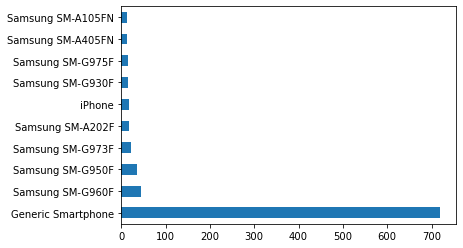

In [33]:
# a majority of users using the device is Gerneric smartphone, of valid questionnaires / useful questionnaires
df_drop['device_make'].value_counts()[:10].plot(kind='barh');

In [34]:
# top 10 browser of valid questionnaires / useful questionnaires 
df_drop['browser'].value_counts()[:10]

Chrome Mobile                 695
Chrome Mobile WebView         227
Facebook                      156
Samsung Internet              145
Mobile Safari                  14
Mobile Safari UI/WKWebView      3
Chrome                          2
Chrome Mobile iOS               1
Name: browser, dtype: int64

In [60]:
# total boreser of valid questionnaires / useful questionnaires
df_drop['browser'].value_counts()[:].sum()

1243

In [36]:
# percentage of Chrome Mobile of valid questionnaires / useful questionnaires
print(np.round(100 * df_drop['browser'].value_counts()[:10][0] / df_drop['browser'].value_counts()[:].sum(), 2), '%')

55.91 %


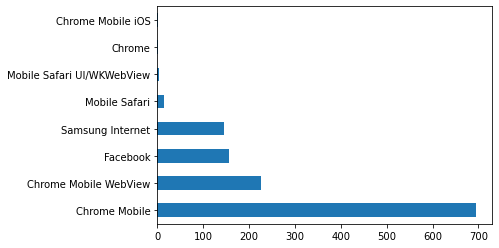

In [37]:
# a majority of users using the browser is Chrome Mobile, of valid questionnaires / useful questionnaires
df_drop['browser'].value_counts()[:10].plot(kind='barh');

### A/B Testing -  Z test Approach

reasons for choose Z test:
- sample size is greater than 30 
- data points are independent 
- sample sizes are equal

#### Null Hypothesis:
H1: p = pₒ 

New Ad will not increase users' engagement with their questionnaire.

#### Alternative Hypothesis:
H2: p ≠ pₒ 

New Ad will increase users' engagement with their questionnaire.

#### Confidence Level: 95% 
#### Significance Level , α = 0.05

In [38]:
# total numbers of valid questionnaires / useful questionnaires of experiment (groups) - control & exposed
df_drop['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [39]:
# individual total numbers of control & exposed groups
total_control = df_drop['experiment'].value_counts().control
total_exposed = df_drop['experiment'].value_counts().exposed
total_control,total_exposed

(586, 657)

In [40]:
# use 'groupby' to divide 'experiment' - 'control & exposed' and 'yes or no', and show it in data frame
experiment_groupby = df_drop.groupby('experiment')['yes','no'].sum()
experiment_groupby

C:\Users\sammi\AppData\Local\Temp/ipykernel_8368/73786601.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  experiment_groupby = df_drop.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [41]:
# total numbers in 'experiment' with response 'yes'
experiment_yes = df_drop.groupby('experiment')['yes'].sum()
print(experiment_yes)

experiment
control    264
exposed    308
Name: yes, dtype: int64


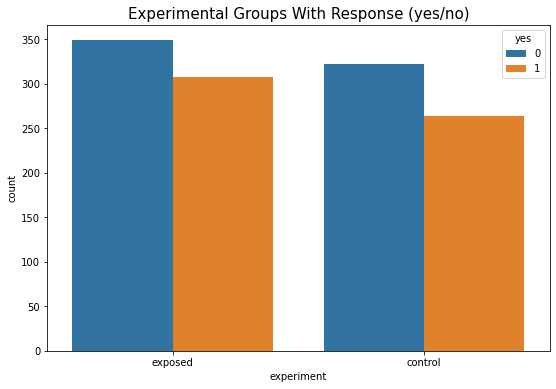

In [65]:
# infographic of 'experiment' groups with respone 'yes and no'
plt.figure(figsize = (9, 6))
sns.countplot(x = 'experiment', hue = 'yes', data = df_drop)
plt.title('Experimental Groups With Response (yes/no)', fontsize=15)
plt.show()
plt.close()

In [43]:
# total numbers in 'experiment' with response 'no'
experiment_no = df_drop.groupby('experiment')['no'].sum()
print(experiment_no)

experiment
control    322
exposed    349
Name: no, dtype: int64


In [44]:
# individual numbers in 'experiment', with response 'yes' in control & exposed groups
control_yes = experiment_yes.iloc[0] # control
exposed_yes = experiment_yes.iloc[1] # exposed
control_yes, exposed_yes

(264, 308)

In [45]:
# click through rate
clt_control = total_control / total_experiment
clt_exposed = total_exposed / total_experiment
print('click through rate_control', np.round(100 * clt_control, 2), '%')
print('click through rate_exposed', np.round(100 * clt_exposed, 2), '%')

click through rate_control 47.14 %
click through rate_exposed 52.86 %


In [46]:
# rate of control & rate of exposed, with response 'yes', click through probability
rate_control = control_yes / total_control
rate_exposed = exposed_yes / total_exposed
print('click through probability_control: ', np.round(100 * rate_control, 2), '%')
print('click through probability_exposed: ', np.round(100 * rate_exposed, 2), '%')

click through probability_control:  45.05 %
click through probability_exposed:  46.88 %


In [47]:
# Significance Level 
alpha = 0.05

$$\hat p_{p}=\frac{X_{control}+X_{exp}}{N_{control}+N_{exp}}$$

In [48]:
# rate of control & exposed groups with response 'yes', conversion rate
p_pooled_hat = (control_yes + exposed_yes) / total_experiment       # or (total_control + total_exposed)
p_pooled_hat

0.46017699115044247

$$\hat s_p^2 =\hat p_p (1-\hat p_p)\cdot \left(\frac{1}{N_{control}}+\frac{1}{N_{exp}}\right)$$

In [49]:
# follow along with the formula
pooled_variance = p_pooled_hat * (1 - p_pooled_hat) * (1 / total_control + 1 / total_exposed)
pooled_variance

0.0008020185896747209

In [50]:
# Standard Error, follow along with the formula
SE = np.sqrt(pooled_variance)
SE

0.028319932727228023

$$Z=\frac{\hat p_{con}-\hat p_{exp}}{\sqrt{\hat s_p^2}}$$

In [51]:
# test statsitics, follow along with the formula
test_stat = (rate_control - rate_exposed) / SE
test_stat

-0.645680181221037

In [52]:
# critical value using the standard normal distribution, follow along with the formula
z_crit = norm.ppf(1 - alpha / 2)
z_crit

1.959963984540054

In [53]:
# Margin of error, follow along with the formula
m = SE * z_crit
m

0.055506048189964116

$$p_{value} = Pr[t\leq Z \text{ or } t\geq Z]=2 \times Pr[t \geq Z] $$

In [54]:
# two sided test and using symmetry property of Normal distibution so we multiple with 2, follow along with the formula
p_value = norm.sf(test_stat) * 2
p_value

1.4815135017801033

In [55]:
# Confidence Interval, follow along with the formula
CI = [(rate_control - rate_exposed) -SE * z_crit, (rate_control - rate_exposed) + SE * z_crit]
CI

[-0.07379166748544828, 0.03722042889447995]

In [66]:
# check if the absolute test_stat number >= z_crit 
if np.abs(test_stat) >= z_crit:
    print('reject the null hypothesis')
elif p_value > alpha:
    print('We can not reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

We can not reject the null hypothesis


In [57]:
print('test statistics stat: ', np.round(test_stat, 4))
print('z_critical: ', np.round(z_crit, 4))
print('p_value: ', np.round(p_value, 4))
print('Confidence Interval of 2 sample Z-test for proportions: ', np.round(CI, 4))

test statistics stat:  -0.6457
z_critical:  1.96
p_value:  1.4815
Confidence Interval of 2 sample Z-test for proportions:  [-0.0738  0.0372]


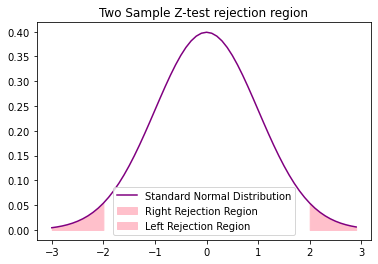

In [58]:
z = np.arange(-3, 3, 0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution', color = 'purple')
plt.fill_between(z[z > z_crit], norm.pdf(z[z > z_crit]), label = 'Right Rejection Region', color ='pink' )
plt.fill_between(z[z < (-1) * z_crit], norm.pdf(z[z < (-1) * z_crit]), label = 'Left Rejection Region', color ='pink' )
plt.title('Two Sample Z-test rejection region')
plt.legend()
plt.show()

<BarContainer object of 200 artists>

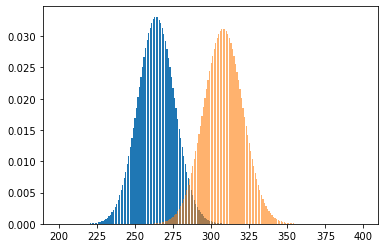

In [59]:
clicks = np.arange(200,400)
prob_control = binom(total_control, rate_control).pmf(clicks)
prob_exposed = binom(total_exposed, rate_exposed).pmf(clicks)
plt.bar(clicks, prob_control, label='A', alpha=1) 
plt.bar(clicks, prob_exposed, label='B', alpha=0.6)

### Facts

- experiment duration:  8 days
- unique users' devices:  269
- unique users' browser:  15


- experiment:  2, (exposed, control)
- unique samples:  8077
- percentage of experiment in control:  50.4 %
- percentage of experiment in exposed:  49.6 %


- invalid questionnaires / useless responses: 6834
- percentage of invalid questionnaires / useless responses: 84.61 %                      
  (included users may see the BIO questionnaire but choose not to respond) 
  



- valid questionnaires / useful questionnaires:1243
- percentage of valid questionnaires / useful questionnaires: 15.38 %

### Findings

#### Based on all samples (8077)
- the first day of questionnaire has more users engagement
- a majority 58.7 % of users using the device -> Gerneric smartphone (4743)
- a majority 56.4 % of users using the browser -> Chrome Mobile (4554)

#### Based on valid questionnaires / useful questionnaires (1243)
- a majority 57.8 % of users using the device -> Gerneric smartphone (719)
- a majority 55.9 % of users using the browser -> Chrome Mobile (695)


### Conclusion of A/B testing, Z test

- Absolute test statistics number 0.645 is less than z_critical 1.959,  
   and p_value 1.481 is greater than the significance level 0.05. 


- Which means we do not have enough evidence to reject the null hypothesis. 

   In other words, this new AD will not increase users' engagement with their questionnaires, and it is not beneficial / unprofitable to the company.